# Real Estate Price Prediction

User want to know the price of the house of unit area depends on 6 parameter as mentioned below.
Transaction date, house age, distance to the nearest MRT station, number of convenience stores in the living circle, geographic coordinate latitude, geographic coordinate longitude.

- Attribute Information:

- The inputs are as follows
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

# Importing required libraries for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Loading real estate dataset from git hub account

In [2]:
Realdf = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/Real_Estate_Price_Prediction/RealEstatCleanUp.csv')

In [3]:
Realdf.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,734808,32.0,84.87882,10,24.98298,121.54024,37.9
1,734808,19.5,306.59470,9,24.98034,121.53951,42.2
2,735050,13.3,561.98450,5,24.98746,121.54391,47.3
3,735020,13.3,561.98450,5,24.98746,121.54391,54.8
4,734777,5.0,390.56840,5,24.97937,121.54245,43.1


- Number of rows and columns in the dataset

In [4]:
Realdf.shape

(414, 7)

- There are 414 rows and 8 columns in the above dataset

- Information about dataset like datatype,count etc

In [5]:
Realdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


# Summary of above output
- Above dataset contains 8 columns.
- Two columns are integer datatype and Six columns are float datatype.
- Above dataset doesnot have any null values or empty values.
- Above dataset have 414 etries total

- Extract Train Test Dataset

- -1 = except last column( house price of unit area) loading all rows and columns to X variable

In [6]:
X = Realdf.iloc[:,:-1]
y = Realdf['Y house price of unit area'].values.reshape(-1,1)

- Converting y values to 2 dimensional array

In [7]:
X.shape,y.shape

((414, 6), (414, 1))

In [8]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,734808,32.0,84.87882,10,24.98298,121.54024
1,734808,19.5,306.59470,9,24.98034,121.53951
2,735050,13.3,561.98450,5,24.98746,121.54391
3,735020,13.3,561.98450,5,24.98746,121.54391
4,734777,5.0,390.56840,5,24.97937,121.54245


# Spliting data to train and test lists

- test size =0.25 : Assigning 25% of dataset to test and 75% of dataset to train.
- random state : it will assign same set of rows to every batch to test the module.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((310, 6), (104, 6), (310, 1), (104, 1))

# Lets Change Distance from meter to Kilometers

In [12]:
X_train1 = X_train.copy()

In [13]:
X_train1[X_train1.columns[2]] = X_train1[X_train1.columns[2]]/1000
X_train1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
268,734989,17.2,0.390568,5,24.97937,121.54245
337,734777,31.3,0.600860,5,24.96871,121.54651
36,734808,14.7,1.935009,2,24.96386,121.51458
351,734777,4.0,2.180245,3,24.96324,121.51241
278,734747,0.0,0.208391,6,24.95618,121.53844


In [14]:
X_test1 = X_test.copy()
X_test1[X_test1.columns[2]] = X_test1[X_test1.columns[2]]/1000
X_test1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
101,734777,12.7,0.170129,1,24.97371,121.52984
181,734900,11.6,0.201894,8,24.98489,121.54121
64,734959,17.5,0.995755,0,24.96305,121.54915
149,734716,34.9,0.179454,8,24.97349,121.54245
270,734959,10.8,0.252582,1,24.97460,121.53046


# Lets Change house age from years to hours 

In [15]:
X_train2 = X_train1.copy()
X_train2[X_train2.columns[1]] = X_train2[X_train2.columns[1]]*364*24
X_train2.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
268,734989,150259.2,0.390568,5,24.97937,121.54245
337,734777,273436.8,0.600860,5,24.96871,121.54651
36,734808,128419.2,1.935009,2,24.96386,121.51458
351,734777,34944.0,2.180245,3,24.96324,121.51241
278,734747,0.0,0.208391,6,24.95618,121.53844


In [16]:
X_test2 = X_test1.copy()
X_test2[X_test2.columns[1]] = X_test2[X_test2.columns[1]]*364*24
X_test2.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
101,734777,110947.2,0.170129,1,24.97371,121.52984
181,734900,101337.6,0.201894,8,24.98489,121.54121
64,734959,152880.0,0.995755,0,24.96305,121.54915
149,734716,304886.4,0.179454,8,24.97349,121.54245
270,734959,94348.8,0.252582,1,24.97460,121.53046


- Checkin minimum and maximum values from X_train column 1,2

In [17]:
X_train.describe().loc[['min', 'max'], X_train.columns[1]]

min     0.0
max    43.8
Name: X2 house age, dtype: float64

In [18]:
X_train2.describe().loc[['min', 'max'], X_train.columns[2]]

min    0.023383
max    6.488021
Name: X3 distance to the nearest MRT station, dtype: float64

In [19]:
X_train.describe().loc[['min', 'max'], X_train.columns[3]]

min     0.0
max    10.0
Name: X4 number of convenience stores, dtype: float64

In [20]:
X_train2.describe().loc[['min', 'max'], X_train.columns[3]]

min     0.0
max    10.0
Name: X4 number of convenience stores, dtype: float64

So let's bring all the features under the same "range of values"

In [21]:
runs = np.array([ 10, 10, 45, 80, 10, 45, 120, 45, 45, 80, 80, 180 ])
runs

array([ 10,  10,  45,  80,  10,  45, 120,  45,  45,  80,  80, 180])

In [22]:
min(runs), max(runs)

(10, 180)

In [23]:
runs - min(runs)

array([  0,   0,  35,  70,   0,  35, 110,  35,  35,  70,  70, 170])

In [24]:
scaled_runs = (runs - min(runs))/ (max(runs) - min(runs))
scaled_runs

array([0.        , 0.        , 0.20588235, 0.41176471, 0.        ,
       0.20588235, 0.64705882, 0.20588235, 0.20588235, 0.41176471,
       0.41176471, 1.        ])

- As per above calculation bring all the values in dataframe from 0 to 1

In [25]:
X_train3 = X_train2.copy()
X_test3 = X_test2.copy()

In [26]:
X_train3.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
268,734989,150259.2,0.390568,5,24.97937,121.54245
337,734777,273436.8,0.600860,5,24.96871,121.54651
36,734808,128419.2,1.935009,2,24.96386,121.51458
351,734777,34944.0,2.180245,3,24.96324,121.51241
278,734747,0.0,0.208391,6,24.95618,121.53844


In [27]:
for col in X_train3.columns:
  col_min = X_train3[col].min()
  col_max = X_train3[col].max()  
  X_train3[col] = (X_train3[col] - col_min)/ (col_max - col_min)
  X_test3[col] = (X_test3[col] - col_min)/ (col_max - col_min)

In [28]:
X_train3.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
268,0.560575,0.392694,0.056799,0.5,0.573194,0.743153
337,0.125257,0.714612,0.089329,0.5,0.444014,0.786931
36,0.188912,0.335616,0.295705,0.2,0.385240,0.442635
351,0.125257,0.091324,0.333640,0.3,0.377727,0.419237
278,0.063655,0.000000,0.028618,0.6,0.292172,0.699914


In [29]:
X_test3.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
101,0.125257,0.289954,0.022700,0.1,0.504605,0.607181
181,0.377823,0.264840,0.027613,0.8,0.640087,0.729782
64,0.498973,0.399543,0.150414,0.0,0.375424,0.815398
149,0.000000,0.796804,0.024142,0.8,0.501939,0.743153
270,0.498973,0.246575,0.035454,0.1,0.515390,0.613867


In [30]:
X_train.describe().loc[ ['min', 'max'], :].T

,min,max
X1 transaction date,734716.00000,735203.00000
X2 house age,0.00000,43.80000
X3 distance to the nearest MRT station,23.38284,6488.02100
X4 number of convenience stores,0.00000,10.00000
X5 latitude,24.93207,25.01459
X6 longitude,121.47353,121.56627


In [57]:
X_train3.describe().loc[ ['min', 'max'], :].T

,min,max
X1 transaction date,0.0,1.0
X2 house age,0.0,1.0
X3 distance to the nearest MRT station,0.0,1.0
X4 number of convenience stores,0.0,1.0
X5 latitude,0.0,1.0
X6 longitude,0.0,1.0


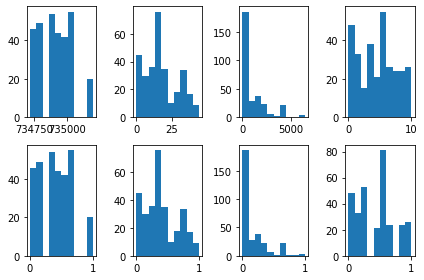

In [32]:
plotids1 = range(241, 245)
plotids2 = range(245, 250)
for col, pid1, pid2 in zip(X_train.columns, plotids1, plotids2):
  ax1 = plt.subplot(pid1)
  ax1.hist(X_train[col])

  ax2 = plt.subplot(pid2)
  ax2.hist(X_train3[col])

plt.tight_layout()

Only for the categorical feature, we see that the distribution is affected

Thus, we **should not scale** a categorical feature

In [33]:
X_train.columns[3] # This is categorical

'X4 number of convenience stores'

# Linear Regression Model

- Due to predict price of house which is continuous variable we are using Linear Regression model to predict the house price.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lrmodel = LinearRegression()
lrmodel.fit(X_train3,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Checking intercept and slope for the dataset

In [36]:
np.get_printoptions()

{'edgeitems': 3,
 'floatmode': 'maxprec',
 'formatter': None,
 'infstr': 'inf',
 'legacy': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'precision': 8,
 'sign': '-',
 'suppress': False,
 'threshold': 1000}

- Checking co_efficient and intercept values from linear regression model.

In [37]:
c = lrmodel.intercept_
m = lrmodel.coef_
c,m

(array([31.32514842]),
 array([[  3.94537857,  -9.93260967, -28.71653264,  11.29848784,
          19.00417832,   0.74359486]]))

- Above output giving in exponensial values: to convert into normal values we using below with statement

In [38]:
with np.printoptions(precision=3, suppress=True):
  print(m,c)

[[  3.945  -9.933 -28.717  11.298  19.004   0.744]] [31.325]


In [39]:
Realdf.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [40]:
coeffdf =  pd.DataFrame({'col':X.columns,'coeff':m[0]})
coeffdf

,col,coeff
0,X1 transaction date,3.945379
1,X2 house age,-9.932610
2,X3 distance to the nearest MRT station,-28.716533
3,X4 number of convenience stores,11.298488
4,X5 latitude,19.004178
5,X6 longitude,0.743595


- Inference from above output

- X3 distance column have high impact on price of house.
- if X3 distance increases than house of price reduces due to negative slop
- X6 longitude is very low impact on price of house

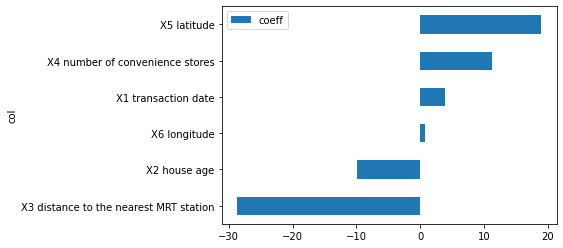

In [41]:
coeffdf.sort_values('coeff').set_index('col').plot.barh()

- Prdecting for X_train to check how model learnt from given data

In [42]:
y_learntdf = lrmodel.predict(X_train3)
y_learntdf[:5]

array([[45.10021581],
       [36.82867785],
       [30.15531324],
       [32.21093297],
       [43.60649619]])

In [43]:
learndf = pd.DataFrame({'Actual':y_train[:,0],'Learnt':y_learntdf[:,0]})
learndf.head()

,Actual,Learnt
0,40.1,45.100216
1,30.9,36.828678
2,22.9,30.155313
3,28.6,32.210933
4,44.0,43.606496


- ploting bar graph to visuialaize actual and learnt values

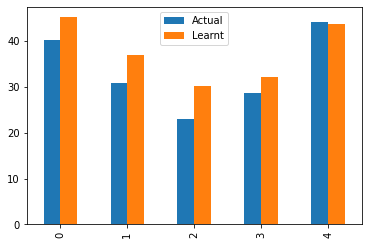

In [44]:
learndf.head().plot(kind='bar')

# Inference from above Graph
- As we including all the columns and converted distance to MRT station column from meter to Kilometer : Error has been increased.

# importing metrics from sklearn to check mean square error

- We are using metrics to check accuracy of our model.
- Using mean square error we can check how difference between actual and predicted values.

In [45]:
from sklearn.metrics import mean_squared_error as mse

In [46]:
train_mse = mse(y_train,y_learntdf)
train_mse

67.21018854523751

In [47]:
rmse_train = np.sqrt(train_mse)
rmse_train

8.19818202684214

- As per above result we have 67.24 training mean square error.
- rmse is root mean square

- predicting for test data set

In [48]:
testdf = lrmodel.predict(X_test3)
testdf[:5]

array([[39.45841839],
       [51.1380725 ],
       [32.7468609 ],
       [41.8478586 ],
       [41.20740955]])

In [49]:
test = pd.DataFrame({'Actual':y_test[:,0],'Pred':testdf[:,0]})
test.head()

,Actual,Pred
0,32.9,39.458418
1,55.9,51.138073
2,25.3,32.746861
3,39.7,41.847859
4,117.5,41.207410


In [50]:
test_mse = mse(y_test,testdf)
test_mse

112.25372379424184

In [51]:
rmse_test = np.sqrt(test_mse)
rmse_test

10.594985785466719

- Above values shows that total difference between actual and predicted values for test dataset is 112 - erorr

# R2 score

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_real = r2_score(y_test,testdf)
r2_real

0.4716413540964376

- R2 score will tell how much accurate and effecient your model is.
- From above values we can see that our model is 45% accurate results.

In [54]:
y_mean = Realdf['Y house price of unit area'].mean()**2
y_mean

1442.4950782982105

In [55]:
n= X.shape[0]
k= X.shape[1]
n,k

(414, 6)

In [56]:
Adj_R2 = 1-(((1-r2_real)*(n-1))/(n-k-1))
Adj_R2

0.46385228314945637

- As we included 6 columns in the dataset and r2 score is 45% 
- our Adjusted R2 score is 44%